<a href="https://colab.research.google.com/github/LandonAmickUNCC/ECGR4105/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Landon Amick 801293791 Homework 2

In [661]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Setting and Checking data**

In [662]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [663]:
# Define the proportion of data to be used for the training set
train_proportion = 0.8

# Create a random mask for splitting the data
# This will generate a boolean array where each element is True with probability `train_proportion`
train_mask = np.random.rand(len(df)) < train_proportion

# Split the DataFrame into training and validation sets based on the mask
train_df = df[train_mask]
validation_df = df[~train_mask]

# Display the shapes of the resulting DataFrames to verify the split
print(train_df.head())
print(validation_df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   
5  10850000  7500         3          3        1      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
5              no             yes        2      yes   semi-furnished  
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
1   12250000  8960 

In [664]:
area = train_df.values[:, 1]
bedrooms = train_df.values[:, 2]
bathrooms = train_df.values[:, 3]
stories = train_df.values[:, 4]
mainroad = train_df.values[:, 5]
guestroom = train_df.values[:, 6]
basement = train_df.values[:, 7]
hotwater = train_df.values[:, 8]
aircon = train_df.values[:, 9]
parking = train_df.values[:, 10]
prefarea = train_df.values[:, 11]
frunished = train_df.values[:, 12]
Y = train_df.values[:, 0]
m = len(Y)
n = len(area)

print('area = ', area[: 5])
print('bedrooms = ', bedrooms[: 5])
print('bathrooms = ', bathrooms[: 5])
print('stories = ', stories[: 5])
print('mainroad = ', mainroad[: 5])
print('Y = ', Y[: 5])
print('m = ', m)
print('n = ', n)

area =  [7420 9960 7500 7420 7500]
bedrooms =  [4 3 4 4 3]
bathrooms =  [2 2 2 1 3]
stories =  [3 2 2 2 1]
mainroad =  ['yes' 'yes' 'yes' 'yes' 'yes']
Y =  [13300000 12250000 12215000 11410000 10850000]
m =  437
n =  437


**1A**


In [665]:
# Use the actual column names from the DataFrame
X1A = train_df[['area','bedrooms','bathrooms','stories','parking']].values
Y1A = train_df[['price']].values

X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X1A))

X1A_val = validation_df[['area','bedrooms','bathrooms','stories','parking']].values
Y1A_val = validation_df['price'].values

m_val = len(Y1A_val) # Number of validation examples

# Add a column of ones for the intercept term to the validation features
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X1A_val))

print(X_multi[:5])
print(X_multi_val[:5])

[[1.00e+00 7.42e+03 4.00e+00 2.00e+00 3.00e+00 2.00e+00]
 [1.00e+00 9.96e+03 3.00e+00 2.00e+00 2.00e+00 2.00e+00]
 [1.00e+00 7.50e+03 4.00e+00 2.00e+00 2.00e+00 3.00e+00]
 [1.00e+00 7.42e+03 4.00e+00 1.00e+00 2.00e+00 2.00e+00]
 [1.00e+00 7.50e+03 3.00e+00 3.00e+00 1.00e+00 2.00e+00]]
[[1.000e+00 8.960e+03 4.000e+00 4.000e+00 4.000e+00 3.000e+00]
 [1.000e+00 7.800e+03 3.000e+00 2.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 4.560e+03 3.000e+00 2.000e+00 2.000e+00 1.000e+00]
 [1.000e+00 7.475e+03 3.000e+00 2.000e+00 4.000e+00 2.000e+00]
 [1.000e+00 7.000e+03 3.000e+00 1.000e+00 4.000e+00 2.000e+00]]


In [666]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [667]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 9000
alpha = 0.00000000001

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history1A = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y1A_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [1.65228596e-01 8.11346678e+02 5.28435473e-01 2.44871234e-01
 3.56717384e-01 1.38157013e-01]


In [668]:
# Calculate the cost on the validation set using the optimal theta values from training
cost_validation1A = compute_cost_multi(X_multi_val, Y1A_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation1A:.4f}")

Cost on the validation set: 1648710778783.5459


Final optimal theta values for multiple linear regression: [1.65228596e-01 8.11346678e+02 5.28435473e-01 2.44871234e-01
 3.56717384e-01 1.38157013e-01]
Final training cost for multiple linear regression: 1717802378254.2295
Final validation cost for multiple linear regression: 1648710778783.546


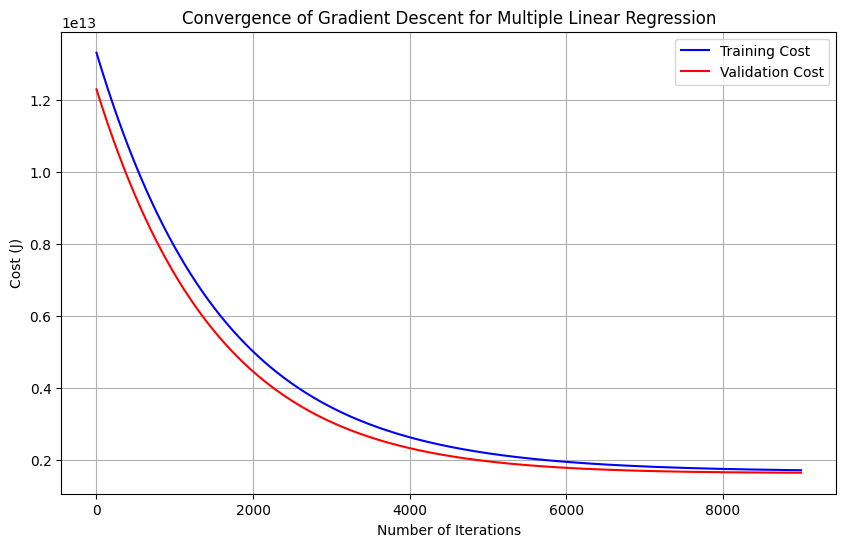

The final training cost value is approximately 1717802378254.2295.
The final validation cost value is approximately 1648710778783.5459.


In [669]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history1A[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history1A, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history1A[-1]:.4f}.")

It seems the area parameter is the highest weighted parameter due to its scale.

**1B**







In [670]:
# Convert 'yes' and 'no' values to 1 and 0 in the relevant columns of both dataframes
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_columns:
    # Create a copy of the slice before modifying it to avoid SettingWithCopyWarning
    train_df.loc[:, col] = train_df[col].replace({'yes': 1, 'no': 0})
    validation_df.loc[:, col] = validation_df[col].replace({'yes': 1, 'no': 0})

# Display the first 5 rows of the modified training DataFrame to verify the changes
print(train_df.head())
print(validation_df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3        1         0        0   
2  12250000  9960         3          2        2        1         0        1   
3  12215000  7500         4          2        2        1         0        1   
4  11410000  7420         4          1        2        1         1        1   
5  10850000  7500         3          3        1        1         0        1   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0               0               1        2        1        furnished  
2               0               0        2        1   semi-furnished  
3               0               1        3        1        furnished  
4               0               1        2        0        furnished  
5               0               1        2        1   semi-furnished  
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
1   12250000  8960 

/tmp/ipython-input-471409677.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df.loc[:, col] = train_df[col].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-471409677.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_df.loc[:, col] = validation_df[col].replace({'yes': 1, 'no': 0})


In [671]:
# Use the actual column names from the DataFrame
X1B = train_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y1B = train_df[['price']].values

X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X1B))

X1B_val = validation_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y1B_val = validation_df['price'].values

m_val = len(Y1B_val) # Number of validation examples

# Add a column of ones for the intercept term to the validation features
X_0_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0_val, X1B_val))

print(X_multi[:5])

[[1.0 7420 4 2 3 1 0 0 0 1 2 1]
 [1.0 9960 3 2 2 1 0 1 0 0 2 1]
 [1.0 7500 4 2 2 1 0 1 0 1 3 1]
 [1.0 7420 4 1 2 1 1 1 0 1 2 0]
 [1.0 7500 3 3 1 1 0 1 0 1 2 1]]


In [672]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [673]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 9000
alpha = 0.00000000001

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history1B = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y1B_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [1.65228590e-01 8.11346651e+02 5.28435456e-01 2.44871226e-01
 3.56717374e-01 1.48760211e-01 4.05855383e-02 6.94765517e-02
 9.40703395e-03 7.79835270e-02 1.38157009e-01 5.43594203e-02]


In [674]:
# Calculate the cost on the validation set using the optimal theta values from training
cost_validation1B = compute_cost_multi(X_multi_val, Y1B_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation1B:.4f}")

Cost on the validation set: 1648710679606.6533


Final optimal theta values for multiple linear regression: [1.65228590e-01 8.11346651e+02 5.28435456e-01 2.44871226e-01
 3.56717374e-01 1.48760211e-01 4.05855383e-02 6.94765517e-02
 9.40703395e-03 7.79835270e-02 1.38157009e-01 5.43594203e-02]
Final training cost for multiple linear regression: 1717802259793.6248
Final validation cost for multiple linear regression: 1648710679606.6526


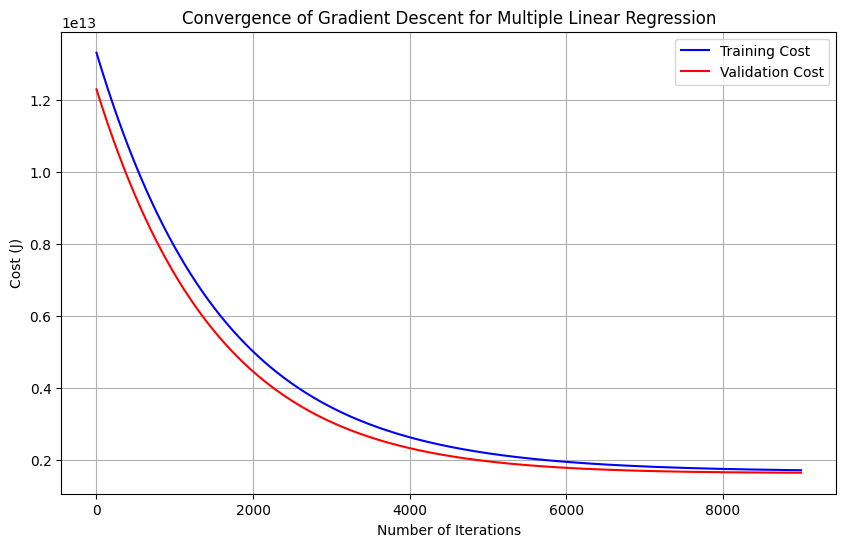

The final training cost value is approximately 1717802259793.6248.
The final validation cost value is approximately 1648710679606.6526.


In [675]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history1B[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history1B, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history1B[-1]:.4f}.")

Similar to 1A the area is the strongest parameter due to its scaling. However the cost does get much lower here with the addition of the new parameters

**2A**

Standarization

In [676]:
# Use the actual column names from the DataFrame
X2AS = train_df[['area','bedrooms','bathrooms','stories','parking']].values
Y2AS = train_df[['price']].values

# Standardize the features using mean and standard deviation from the training data
# Calculate mean and standard deviation from the training data
mean = X2AS.mean(axis=0)
std = X2AS.std(axis=0)

# Standardize the training features
X2A_standardized = (X2AS - mean) / std

# Add a column of ones for the intercept term to the standardized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X2A_standardized))

print("Standardized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for standardization using the same mean and std from training
X2AS_val = validation_df[['area','bedrooms','bathrooms','stories','parking']].values
Y2AS_val = validation_df['price'].values

# Standardize the validation features using the mean and std from the training data
X2A_val_standardized = (X2AS_val - mean) / std

# Add a column of ones for the intercept term to the standardized validation features
m_val = len(Y2AS_val) # Number of validation examples
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X2A_val_standardized))

print("\nStandardized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Standardized X_multi (first 5 rows):
[[ 1.          1.04743932  1.37245061  1.46248909  1.33880911  1.50549304]
 [ 1.          2.21897737  0.          1.46248909  0.18711702  1.50549304]
 [ 1.          1.08433816  1.37245061  1.46248909  0.18711702  2.6637685 ]
 [ 1.          1.04743932  1.37245061 -0.57938865  0.18711702  1.50549304]
 [ 1.          1.08433816  0.          3.50436683 -0.96457507  1.50549304]]

Standardized X_multi_val (first 5 rows):
[[ 1.          1.75774191  1.37245061  5.54624456  2.49050121  2.6637685 ]
 [ 1.          1.22270879  0.          1.46248909  0.18711702 -0.81105787]
 [ 1.         -0.27169407  0.          1.46248909  0.18711702  0.34721759]
 [ 1.          1.07280727  0.          1.46248909  2.49050121  1.50549304]
 [ 1.          0.85372043  0.         -0.57938865  2.49050121  1.50549304]]


In [677]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [678]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 250
alpha = 0.01

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history2AS = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y2AS_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [4405534.98749102  710384.82181329  198396.53641438  570282.74223985
  425305.0467892   356417.5032347 ]


In [679]:
cost_validation2AS = compute_cost_multi(X_multi_val, Y2AS_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation2AS:.4f}")

Cost on the validation set: 769877120713.0847


Final optimal theta values for multiple linear regression: [4405534.98749102  710384.82181329  198396.53641438  570282.74223985
  425305.0467892   356417.5032347 ]
Final training cost for multiple linear regression: 861732217015.851
Final validation cost for multiple linear regression: 769877120713.0847


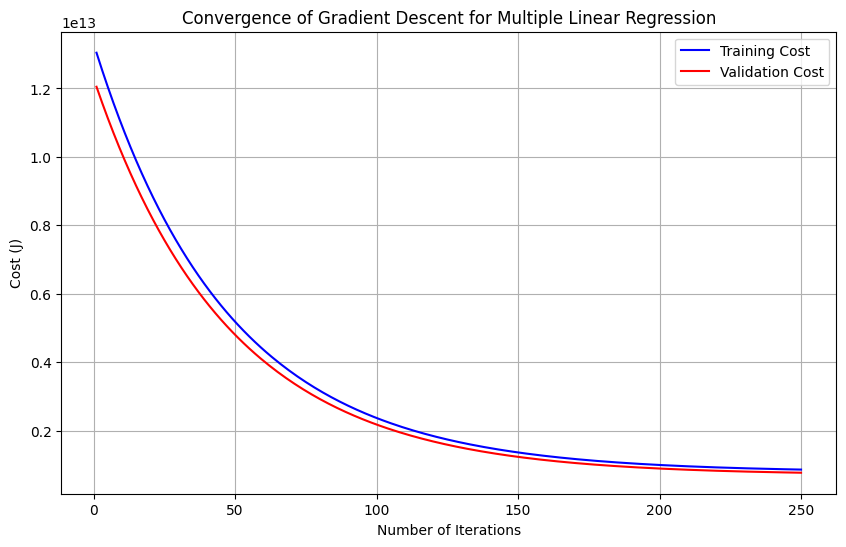

The final training cost value is approximately 861732217015.8510.
The final validation cost value is approximately 769877120713.0847.


In [680]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history2AS[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history2AS, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history2AS[-1]:.4f}.")

Normalization

In [681]:
# Use the actual column names from the DataFrame
X2AN = train_df[['area','bedrooms','bathrooms','stories','parking']].values
Y2AN = train_df[['price']].values

# Normalize the features using min-max scaling from the training data
# Calculate min and max from the training data
min_vals = X2AN.min(axis=0)
max_vals = X2AN.max(axis=0)

# Apply normalization to the training features
# Add a small epsilon to avoid division by zero if max == min
epsilon = 1e-7
X2A_normalized = (X2AN - min_vals) / (max_vals - min_vals + epsilon)

# Add a column of ones for the intercept term to the normalized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X2A_normalized))

print("Normalized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for normalization using the same min and max from training
X2AN_val = validation_df[['area','bedrooms','bathrooms','stories','parking']].values
Y2AN_val = validation_df['price'].values

# Apply normalization to the validation features using the min and max from the training data
X2A_val_normalized = (X2AN_val - min_vals) / (max_vals - min_vals + epsilon)

# Add a column of ones for the intercept term to the normalized validation features
m_val = len(Y2AN_val) # Number of validation examples
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X2A_val_normalized))

print("\nNormalized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Normalized X_multi (first 5 rows):
[[1.         0.39656357 0.59999999 0.49999998 0.66666664 0.66666664]
 [1.         0.57113402 0.39999999 0.49999998 0.33333332 0.66666664]
 [1.         0.40206186 0.59999999 0.49999998 0.33333332 0.99999997]
 [1.         0.39656357 0.59999999 0.         0.33333332 0.66666664]
 [1.         0.40206186 0.39999999 0.99999995 0.         0.66666664]]

Normalized X_multi_val (first 5 rows):
[[1.         0.5024055  0.59999999 1.49999993 0.99999997 0.99999997]
 [1.         0.42268041 0.39999999 0.49999998 0.33333332 0.        ]
 [1.         0.2        0.39999999 0.49999998 0.33333332 0.33333332]
 [1.         0.40034364 0.39999999 0.49999998 0.99999997 0.66666664]
 [1.         0.36769759 0.39999999 0.         0.99999997 0.66666664]]


In [682]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [683]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 500
alpha = 0.01

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history2AN = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y2AN_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [3144270.2125343  1297348.39508864 1454699.49060069 1148886.41034791
 1296044.22092911 1222097.88945751]


In [684]:
cost_validation2AN = compute_cost_multi(X_multi_val, Y2AN_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation2AN:.4f}")

Cost on the validation set: 723214382051.2637


Final optimal theta values for multiple linear regression: [3144270.2125343  1297348.39508864 1454699.49060069 1148886.41034791
 1296044.22092911 1222097.88945751]
Final training cost for multiple linear regression: 1030328189673.7908
Final validation cost for multiple linear regression: 723214382051.2637


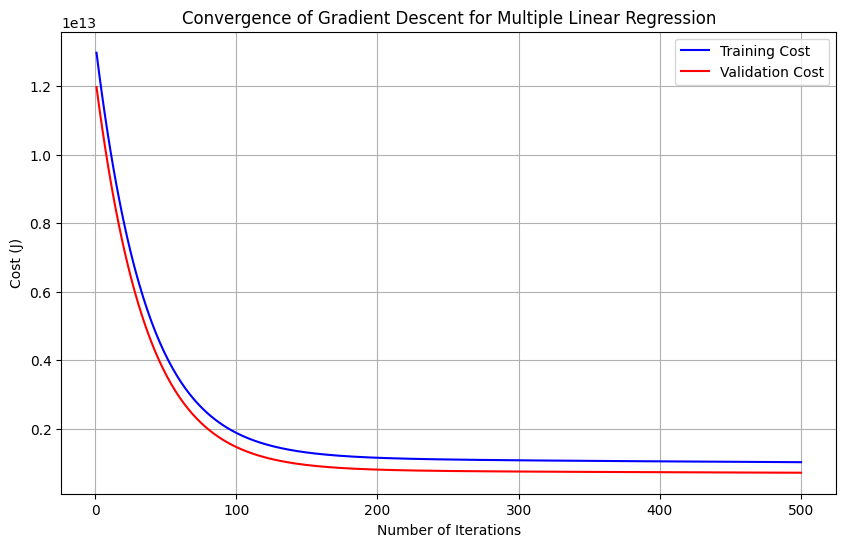

The final training cost value is approximately 1030328189673.7908.
The final validation cost value is approximately 723214382051.2637.


In [685]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history2AN[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history2AN, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history2AN[-1]:.4f}.")

The lowest training cost comes from the standardization method by a relatively small margin. This is better than normalization from a validation cost POV which is the right way too look at it from.

**2B**

Standardization

In [686]:
# Use the actual column names from the DataFrame
X2BS = train_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y2BS = train_df[['price']].values

# Convert relevant columns to float before calculating mean and std
X2BS = X2BS.astype(np.float64)

# Standardize the features using mean and standard deviation from the training data
# Calculate mean and standard deviation from the training data
mean = X2BS.mean(axis=0)
std = X2BS.std(axis=0)

# Standardize the training features
X2B_standardized = (X2BS - mean) / std

# Add a column of ones for the intercept term to the standardized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X2B_standardized))

print("Standardized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for standardization using the same mean and std from training
X2BS_val = validation_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y2BS_val = validation_df['price'].values

# Convert relevant columns to float for validation data as well
X2BS_val = X2BS_val.astype(np.float64)


# Standardize the validation features using the mean and std from the training data
X2B_val_standardized = (X2BS_val - mean) / std

# Add a column of ones for the intercept term to the standardized validation features
m_val = len(Y2BS_val) # Number of validation examples
X_0B_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0B_val, X2B_val_standardized))

print("\nStandardized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Standardized X_multi (first 5 rows):
[[ 1.          1.04743932  1.37245061  1.46248909  1.33880911  0.40278287
  -0.44413993 -0.71196668 -0.20118695  1.41908178  1.50549304  1.81226756]
 [ 1.          2.21897737  0.          1.46248909  0.18711702  0.40278287
  -0.44413993  1.40456011 -0.20118695 -0.70468102  1.50549304  1.81226756]
 [ 1.          1.08433816  1.37245061  1.46248909  0.18711702  0.40278287
  -0.44413993  1.40456011 -0.20118695  1.41908178  2.6637685   1.81226756]
 [ 1.          1.04743932  1.37245061 -0.57938865  0.18711702  0.40278287
   2.25154268  1.40456011 -0.20118695  1.41908178  1.50549304 -0.5517949 ]
 [ 1.          1.08433816  0.          3.50436683 -0.96457507  0.40278287
  -0.44413993  1.40456011 -0.20118695  1.41908178  1.50549304  1.81226756]]

Standardized X_multi_val (first 5 rows):
[[ 1.          1.75774191  1.37245061  5.54624456  2.49050121  0.40278287
  -0.44413993 -0.71196668 -0.20118695  1.41908178  2.6637685  -0.5517949 ]
 [ 1.          1.22270879 

In [687]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [688]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 500
alpha = 0.01

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history2BS = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y2BS_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [4762641.11647762  560380.61691774  130110.53105355  519077.28340638
  352254.31328549  169616.26735926  154338.09361405  183485.09226494
  159634.79046569  387023.35511196  282451.14258028  281483.03295322]


In [689]:
cost_validation2BS = compute_cost_multi(X_multi_val, Y2BS_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation2BS:.4f}")

Cost on the validation set: 544387388421.7202


Final optimal theta values for multiple linear regression: [4762641.11647762  560380.61691774  130110.53105355  519077.28340638
  352254.31328549  169616.26735926  154338.09361405  183485.09226494
  159634.79046569  387023.35511196  282451.14258028  281483.03295322]
Final training cost for multiple linear regression: 582039829401.7444
Final validation cost for multiple linear regression: 544387388421.7202


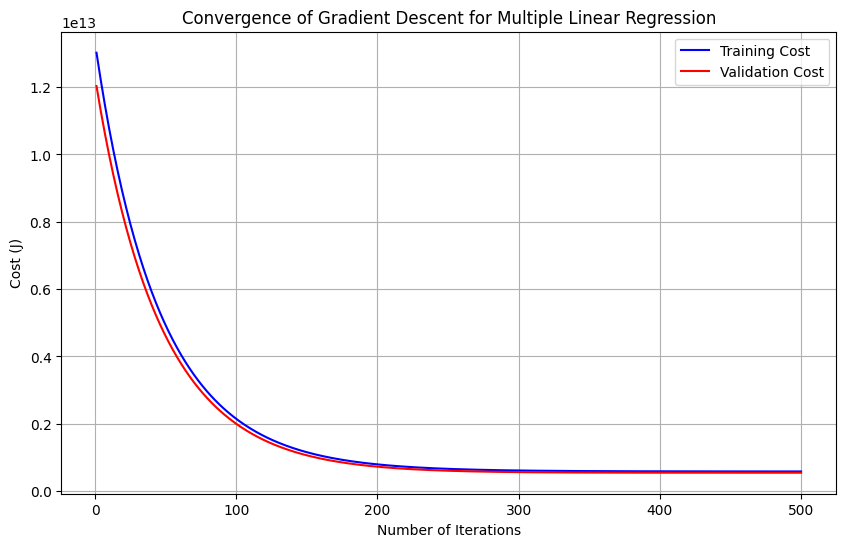

The final training cost value is approximately 582039829401.7444.
The final validation cost value is approximately 544387388421.7202.


In [690]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history2BS[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history2BS, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history2BS[-1]:.4f}.")

Normalization

In [691]:
# Use the actual column names from the DataFrame
X2BN = train_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y2BN = train_df[['price']].values

# Normalize the features using min-max scaling from the training data
# Calculate min and max from the training data
min_vals = X2BN.min(axis=0)
max_vals = X2BN.max(axis=0)

# Apply normalization to the training features
# Add a small epsilon to avoid division by zero if max == min
epsilon = 1e-7
X2B_normalized = (X2BN - min_vals) / (max_vals - min_vals + epsilon)

# Add a column of ones for the intercept term to the normalized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X2B_normalized))

print("Normalized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for normalization using the same min and max from training
X2BN_val = validation_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y2BN_val = validation_df['price'].values

# Apply normalization to the validation features using the min and max from the training data
X2B_val_normalized = (X2BN_val - min_vals) / (max_vals - min_vals + epsilon)

# Add a column of ones for the intercept term to the normalized validation features
m_val = len(Y2BN_val) # Number of validation examples
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X2B_val_normalized))

print("\nNormalized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Normalized X_multi (first 5 rows):
[[1.0 0.39656357388043595 0.5999999880000002 0.4999999750000013
  0.6666666444444452 0.9999999000000099 0.0 0.0 0.0 0.9999999000000099
  0.6666666444444452 0.9999999000000099]
 [1.0 0.5711340206146314 0.39999999200000014 0.4999999750000013
  0.3333333222222226 0.9999999000000099 0.0 0.9999999000000099 0.0 0.0
  0.6666666444444452 0.9999999000000099]
 [1.0 0.40206185566733976 0.5999999880000002 0.4999999750000013
  0.3333333222222226 0.9999999000000099 0.0 0.9999999000000099 0.0
  0.9999999000000099 0.9999999666666678 0.9999999000000099]
 [1.0 0.39656357388043595 0.5999999880000002 0.0 0.3333333222222226
  0.9999999000000099 0.9999999000000099 0.9999999000000099 0.0
  0.9999999000000099 0.6666666444444452 0.0]
 [1.0 0.40206185566733976 0.39999999200000014 0.9999999500000026 0.0
  0.9999999000000099 0.0 0.9999999000000099 0.0 0.9999999000000099
  0.6666666444444452 0.9999999000000099]]

Normalized X_multi_val (first 5 rows):
[[1.0 0.5024054982783339 0.5

In [692]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [693]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 2000
alpha = 0.001

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history2BN = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y2BN_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [1827437.63874984  621410.59778986  844171.66830126  574599.09744576
  723230.7647642  1531565.49653324  418816.7963298   630878.68564295
  147144.03028133  897603.64003665  635177.19984198  602435.11974705]


In [694]:
cost_validation2BN = compute_cost_multi(X_multi_val, Y2BS_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation2BN:.4f}")

Cost on the validation set: 726649298440.5699


Final optimal theta values for multiple linear regression: [1827437.63874984  621410.59778986  844171.66830126  574599.09744576
  723230.7647642  1531565.49653324  418816.7963298   630878.68564295
  147144.03028133  897603.64003665  635177.19984198  602435.11974705]
Final training cost for multiple linear regression: 877425990583.1022
Final validation cost for multiple linear regression: 726649298440.5703


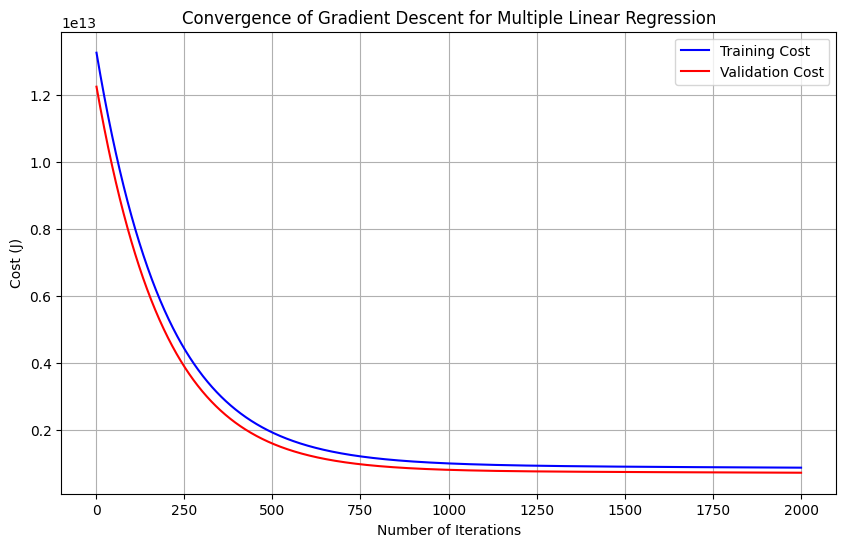

The final training cost value is approximately 877425990583.1022.
The final validation cost value is approximately 726649298440.5703.


In [695]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history2BN[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history2BN, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history2BN[-1]:.4f}.")

Again like 2A the standardization seems to help the most. While the values are still insanely high the standardization is pulling down the training cost and validation cost more than the normalization approach.

**3A**

In [696]:
# Use the actual column names from the DataFrame
X3AS = train_df[['area','bedrooms','bathrooms','stories','parking']].values
Y3AS = train_df[['price']].values

# Convert to float before calculating mean and std
X3AS = X3AS.astype(np.float64)

# Standardize the features using mean and standard deviation from the training data
# Calculate mean and standard deviation from the training data
mean = X3AS.mean(axis=0)
std = X3AS.std(axis=0)

# Standardize the training features
X3A_standardized = (X3AS - mean) / std

# Add a column of ones for the intercept term to the standardized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X3A_standardized))

print("Standardized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for standardization using the same mean and std from training
X3AS_val = validation_df[['area','bedrooms','bathrooms','stories','parking']].values
Y3AS_val = validation_df['price'].values

# Convert to float for validation data as well
X3AS_val = X3AS_val.astype(np.float64)

# Standardize the validation features using the mean and std from the training data
X3A_val_standardized = (X3AS_val - mean) / std

# Add a column of ones for the intercept term to the standardized validation features
m_val = len(Y3AS_val) # Number of validation examples
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X3A_val_standardized))

print("\nStandardized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Standardized X_multi (first 5 rows):
[[ 1.          1.04743932  1.37245061  1.46248909  1.33880911  1.50549304]
 [ 1.          2.21897737  0.          1.46248909  0.18711702  1.50549304]
 [ 1.          1.08433816  1.37245061  1.46248909  0.18711702  2.6637685 ]
 [ 1.          1.04743932  1.37245061 -0.57938865  0.18711702  1.50549304]
 [ 1.          1.08433816  0.          3.50436683 -0.96457507  1.50549304]]

Standardized X_multi_val (first 5 rows):
[[ 1.          1.75774191  1.37245061  5.54624456  2.49050121  2.6637685 ]
 [ 1.          1.22270879  0.          1.46248909  0.18711702 -0.81105787]
 [ 1.         -0.27169407  0.          1.46248909  0.18711702  0.34721759]
 [ 1.          1.07280727  0.          1.46248909  2.49050121  1.50549304]
 [ 1.          0.85372043  0.         -0.57938865  2.49050121  1.50549304]]


In [697]:
def compute_cost_multi(X_multi, y, theta, lambda_param=0):
    """
    Compute cost for linear regression with multiple features and optional L2 regularization.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    lambda_param : Regularization parameter (scalar), default is 0 for no regularization

    Returns:
    J : Scalar value, the cost with L2 regularization
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    # Add L2 regularization term, excluding the bias term (theta[0])
    regularization_term = (lambda_param / (2 * m)) * np.sum(np.square(theta[1:]))
    J = 1 / (2 * m) * np.sum(sqrErrors) + regularization_term
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val, lambda_param=0):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features and optional L2 regularization.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values
    lambda_param : Regularization parameter (scalar), default is 0 for no regularization

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient with regularization, excluding the bias term (theta[0])
        gradient = (1 / m) * X_multi.transpose().dot(errors)
        gradient[1:] += (lambda_param / m) * theta[1:] # Apply regularization to all but the bias term

        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta, lambda_param)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta, lambda_param)


    return theta, train_cost_history, validation_cost_history

In [698]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 200
alpha = 0.02
lambda_param = 1000

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history3AS = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y3AS_val, lambda_param)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [4709821.84337347  274997.55664937  143422.25044848  246159.30496401
  177653.78636383  170840.72091506]


In [699]:
cost_validation3AS = compute_cost_multi(X_multi_val, Y3AS_val, theta_optimal_multi, lambda_param)

print(f"Cost on the validation set: {cost_validation3AS:.4f}")

Cost on the validation set: 1839039555341.7886


Final optimal theta values for multiple linear regression: [4709821.84337347  274997.55664937  143422.25044848  246159.30496401
  177653.78636383  170840.72091506]
Final training cost for multiple linear regression: 1377315918194.513
Final validation cost for multiple linear regression: 1839039555341.7886


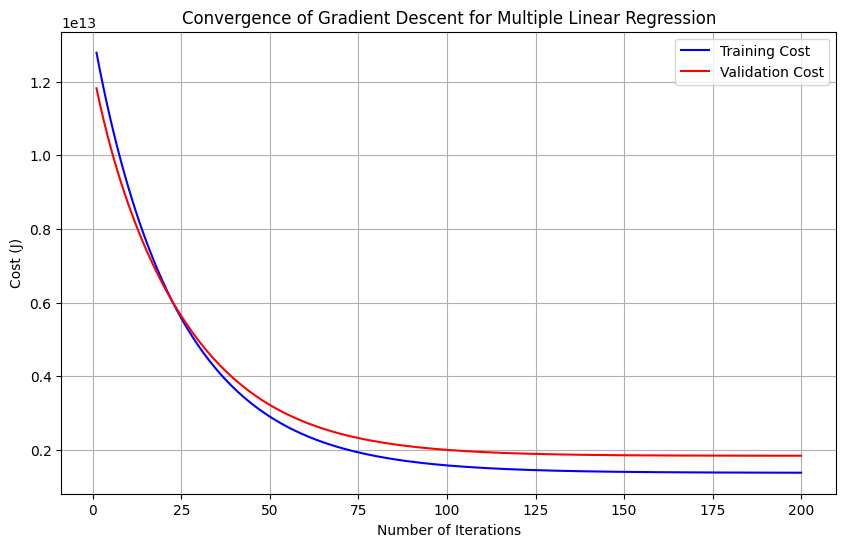

The final training cost value is approximately 1377315918194.5129.
The final validation cost value is approximately 1839039555341.7886.


In [700]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history3AS[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history3AS, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history3AS[-1]:.4f}.")

This is much much better than 2A or 2B standardization pulling the validation cost much lower than before.

3B

In [701]:
# Use the actual column names from the DataFrame
X3BS = train_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y3BS = train_df[['price']].values

# Convert to float before calculating mean and std
X3BS = X3BS.astype(np.float64)

# Standardize the features using mean and standard deviation from the training data
# Calculate mean and standard deviation from the training data
mean = X3BS.mean(axis=0)
std = X3BS.std(axis=0)

# Standardize the training features
X3B_standardized = (X3BS - mean) / std

# Add a column of ones for the intercept term to the standardized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X3B_standardized))

print("Standardized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for standardization using the same mean and std from training
X3BS_val = validation_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y3BS_val = validation_df['price'].values

# Convert to float for validation data as well
X3BS_val = X3BS_val.astype(np.float64)

# Standardize the validation features using the mean and std from the training data
X3B_val_standardized = (X3BS_val - mean) / std

# Add a column of ones for the intercept term to the standardized validation features
m_val = len(Y3AS_val) # Number of validation examples
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X3B_val_standardized))

print("\nStandardized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Standardized X_multi (first 5 rows):
[[ 1.          1.04743932  1.37245061  1.46248909  1.33880911  0.40278287
  -0.44413993 -0.71196668 -0.20118695  1.41908178  1.50549304  1.81226756]
 [ 1.          2.21897737  0.          1.46248909  0.18711702  0.40278287
  -0.44413993  1.40456011 -0.20118695 -0.70468102  1.50549304  1.81226756]
 [ 1.          1.08433816  1.37245061  1.46248909  0.18711702  0.40278287
  -0.44413993  1.40456011 -0.20118695  1.41908178  2.6637685   1.81226756]
 [ 1.          1.04743932  1.37245061 -0.57938865  0.18711702  0.40278287
   2.25154268  1.40456011 -0.20118695  1.41908178  1.50549304 -0.5517949 ]
 [ 1.          1.08433816  0.          3.50436683 -0.96457507  0.40278287
  -0.44413993  1.40456011 -0.20118695  1.41908178  1.50549304  1.81226756]]

Standardized X_multi_val (first 5 rows):
[[ 1.          1.75774191  1.37245061  5.54624456  2.49050121  0.40278287
  -0.44413993 -0.71196668 -0.20118695  1.41908178  2.6637685  -0.5517949 ]
 [ 1.          1.22270879 

In [702]:
def compute_cost_multi(X_multi, y, theta, lambda_param=0):
    """
    Compute cost for linear regression with multiple features and optional L2 regularization.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    lambda_param : Regularization parameter (scalar), default is 0 for no regularization

    Returns:
    J : Scalar value, the cost with L2 regularization
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    # Add L2 regularization term, excluding the bias term (theta[0])
    regularization_term = (lambda_param / (2 * m)) * np.sum(np.square(theta[1:]))
    J = 1 / (2 * m) * np.sum(sqrErrors) + regularization_term
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val, lambda_param=0):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features and optional L2 regularization.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values
    lambda_param : Regularization parameter (scalar), default is 0 for no regularization

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient with regularization, excluding the bias term (theta[0])
        gradient = (1 / m) * X_multi.transpose().dot(errors)
        gradient[1:] += (lambda_param / m) * theta[1:] # Apply regularization to all but the bias term

        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta, lambda_param)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta, lambda_param)


    return theta, train_cost_history, validation_cost_history

In [703]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 500
alpha = 0.01
lambda_param = 1000

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history3BN = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y3BS_val, lambda_param)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [4762641.11647761  239160.18366016  132310.21568279  227075.30392753
  158135.91765865  111511.269628    107322.8862937    83969.17692069
   53833.73495807  188902.35160314  153467.82251491  148714.58692397]


In [704]:
cost_validation3BN = compute_cost_multi(X_multi_val, Y3BS_val, theta_optimal_multi, lambda_param)

print(f"Cost on the validation set: {cost_validation3BN:.4f}")

Cost on the validation set: 1935407050500.8784


Final optimal theta values for multiple linear regression: [4762641.11647761  239160.18366016  132310.21568279  227075.30392753
  158135.91765865  111511.269628    107322.8862937    83969.17692069
   53833.73495807  188902.35160314  153467.82251491  148714.58692397]
Final training cost for multiple linear regression: 1204508935817.9785
Final validation cost for multiple linear regression: 1935407050500.8784


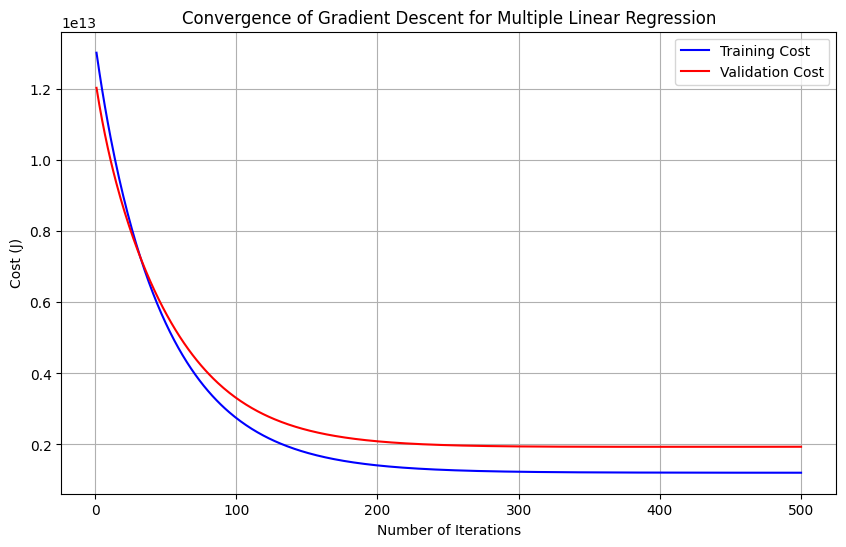

The final training cost value is approximately 1204508935817.9785.
The final validation cost value is approximately 1935407050500.8784.


In [705]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history3BN[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history3BN, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history3BN[-1]:.4f}.")

It seems like the using the less categories actually helps more as the extra categories makes the validation cost bump up around the 75 iteration mark.